In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm #çoklu regresyon için kullanılan kütüphane


df = pd.read_csv("C:/Users/celli/Desktop/ds_salaries.csv")
df.head()  #ilk 5 satır görüntüler

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [3]:
df=df.drop('Unnamed: 0',axis=1) #unnamed sütunu gereksizdi kaldırdım

In [4]:
df['experience_level'].replace({'EN':'Entry-Level','MI':'Mid-Level','EX':'Executive Level','SE':'Senior'},inplace=True)
df['employment_type'].replace({'PT':'Part-Time','FT':'Full-Time','CT':'Contract','FL':'Freelance'},inplace=True) #dictionary oluşturdum.

In [5]:
df.head() 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,Full-Time,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,Senior,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,Senior,Full-Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,Mid-Level,Full-Time,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
df.isnull().sum() #eksik veri taraması

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.describe() #tanımlayıcı istatistikler(ortalama vb.)

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [8]:
df['job_title'].value_counts() #hangi meslekten kaç kişi var?

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [9]:
df['company_size'].value_counts() #şirket büyüklükleri mevcutları

M    326
L    198
S     83
Name: company_size, dtype: int64

In [10]:
df['experience_level'].value_counts() #deneyim seviyesine göre gruplandırma

Senior             280
Mid-Level          213
Entry-Level         88
Executive Level     26
Name: experience_level, dtype: int64

In [11]:
df['remote_ratio'].value_counts() #yüzdelik olarak

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

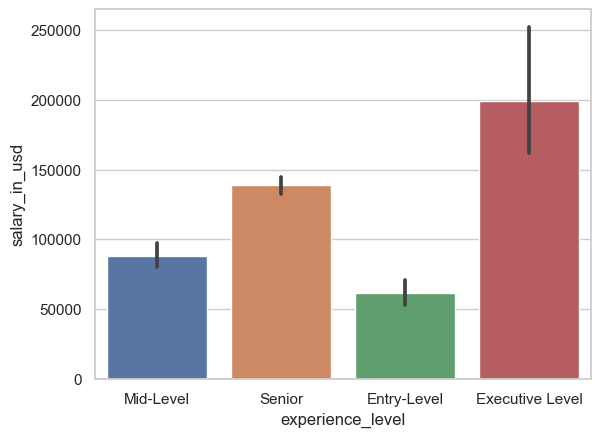

In [12]:
sns.set_theme(style="whitegrid") #deneyim seviyesine göre yıllık ortalama maaşları gösteren bar grafiği
ax=sns.barplot(x="experience_level",y="salary_in_usd",data=df)

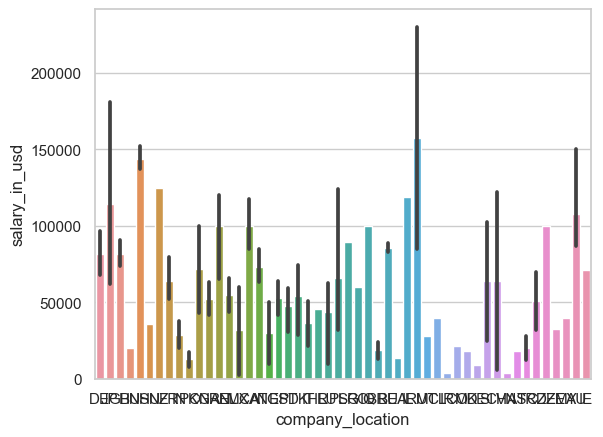

In [13]:
sns.set_theme(style="whitegrid") #yaşadığı ülkeye göre yıllık ortalama maaşı gösteren bar grafiği
ax=sns.barplot(x="company_location",y="salary_in_usd",data=df)

(-1.1260726604690223,
 1.1583976198476074,
 -1.1501334768688432,
 1.102387308422326)

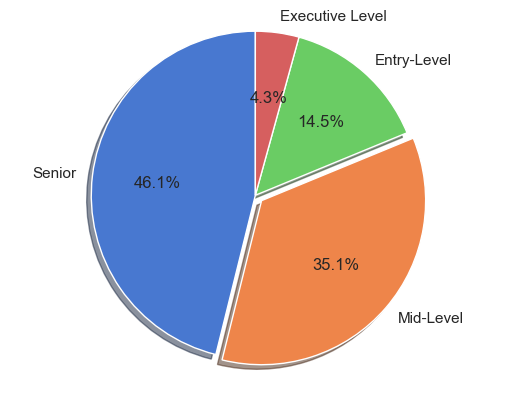

In [14]:
txtlabels='Senior','Mid-Level','Entry-Level','Executive Level' #deneyim seviyelerinin dağılımının pasta grafiği ile gösterimi
fractions=[280,213,88,26]
offsets=(0,0.05,0,0)
plt.pie(fractions,explode=offsets,labels=txtlabels,autopct='%1.1f%%',shadow=True,startangle=90,colors=sns.color_palette('muted'))
plt.axis('equal')

(-1.1148833204013637,
 1.1720024590787181,
 -1.114009206111441,
 1.1006671050529258)

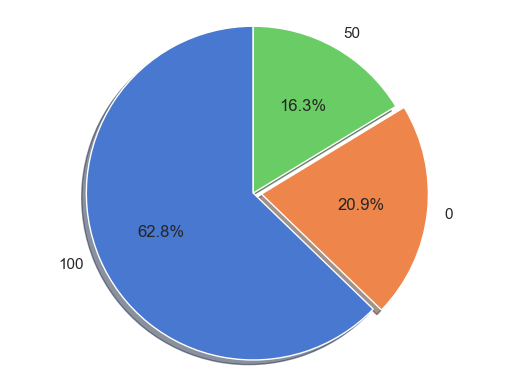

In [15]:
txtlabels='100','0','50' #çalışma şeklinin(0,50,100 yüzdelik remote çalışma oranı) pasta grafiği ile gösterimi 
fractions=[381,127,99]
offsets=(0,0.05,0)
plt.pie(fractions,explode=offsets,labels=txtlabels,autopct='%1.1f%%',shadow=True,startangle=90,colors=sns.color_palette('muted'))
plt.axis('equal')


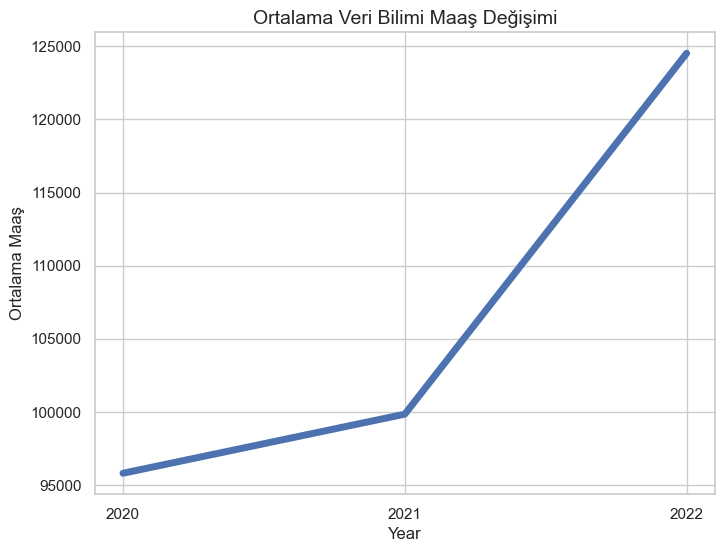

In [16]:
ort_maas_degisim=df.groupby('work_year')['salary_in_usd'].mean() #yıllara göre veri bilimi maaş değişimini gösteren çizgi grafiği
plt.figure(figsize=(8,6))
sns.lineplot(x=ort_maas_degisim.index,y=ort_maas_degisim.values,linewidth=5)
xticks=[2020,2021,2022]
plt.xticks(xticks,xticks)
plt.xlabel('Year')
plt.ylabel('Ortalama Maaş')
plt.title('Ortalama Veri Bilimi Maaş Değişimi', size=14);

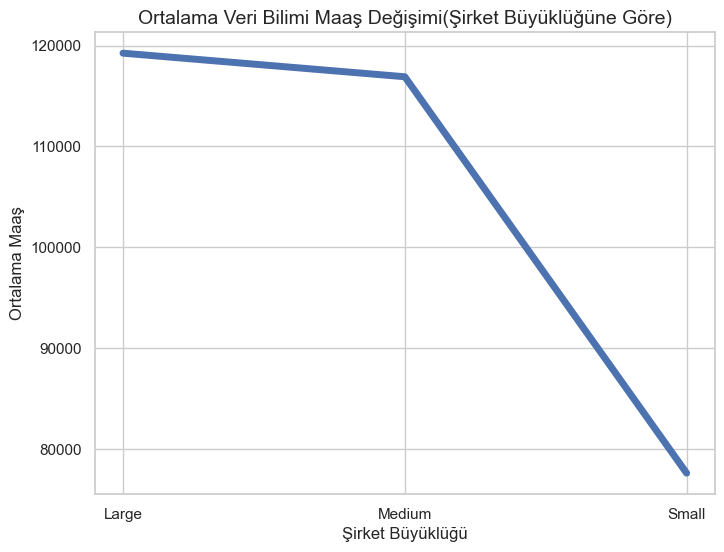

In [17]:
ort_maas_degisim=df.groupby('company_size')['salary_in_usd'].mean() # şirket büyüklüğüne göre ortalama veri bilimi maaş değişimi
plt.figure(figsize=(8,6))
sns.lineplot(x=ort_maas_degisim.index,y=ort_maas_degisim.values,linewidth=5)

xticks = ['Large', 'Medium', 'Small']
plt.xticks(range(len(xticks)), xticks)
plt.xlabel('Şirket Büyüklüğü')
plt.ylabel('Ortalama Maaş')
plt.title('Ortalama Veri Bilimi Maaş Değişimi(Şirket Büyüklüğüne Göre)', size=14);

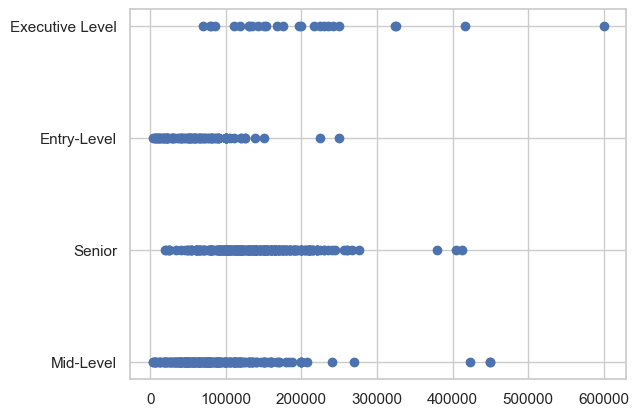

In [18]:
X=df['salary_in_usd'] # deneim seviyesine göre maaş değişiminin saçılım grafiği
y = df['experience_level']
plt.scatter(X, y)
plt.show()

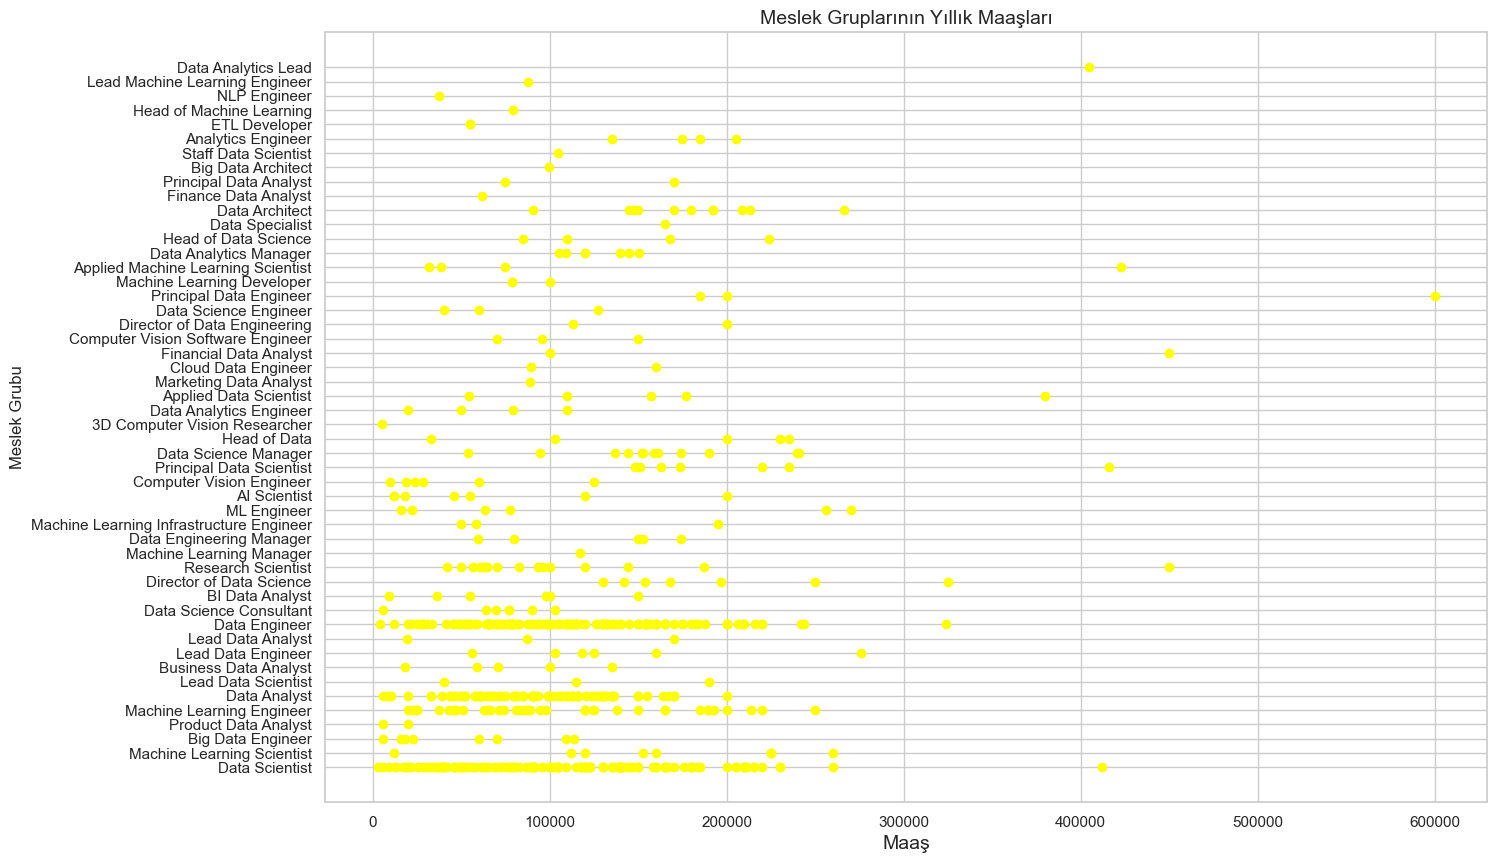

In [20]:
plt.scatter(x=df.salary_in_usd,y=df.job_title,color="yellow") #meslek gruplarının yıllık maaşlarını gösteren saçılım grafiği
plt.title('Meslek Gruplarının Yıllık Maaşları',fontsize=14)
plt.xlabel('Maaş',fontsize=14)
plt.ylabel('Meslek Grubu')
plt.rcParams['figure.figsize']=(10,10)
plt.show()

In [21]:
korelasyon=df.corr(method="pearson") #değişkenler arası ilişkiyi gözlemlemek için korelasyon tablosu 
korelasyon

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


In [22]:
#Tabloya göre değişkenler arasında( 0,5 değerinin altında) güçlü bir ilişki gözlemlenmemiştir. 

<AxesSubplot:>

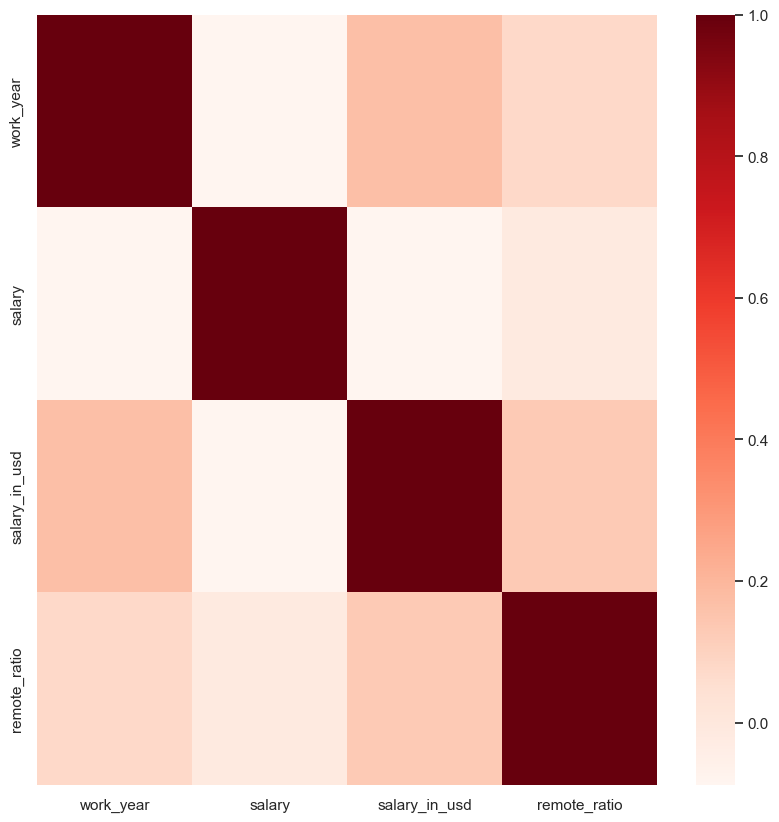

In [23]:
sns.heatmap(korelasyon,xticklabels=korelasyon.columns,yticklabels=korelasyon.columns,cmap="Reds") #korelasyon ısı haritası

In [24]:
#Veri Analizi:Veriyi incelediğimizde veride birden fazla bağımsız değişkenin bağımlı değişken olan maaş değişkenini 
#etkileyeceğinden çoklu regresyon modelini uygun gördüm.

# Bağımlı değişkeni ve bağımsız değişkenleri tanımlama
y = df['salary_in_usd']
x = df[['experience_level','employment_type', 'job_title', 'remote_ratio','company_size','work_year']]

# Kategorik değişkenleri dummy değişkenlere dönüştürme
x = pd.get_dummies(x, columns=['experience_level', 'employment_type', 'job_title', 'remote_ratio','company_size','work_year'])

# Modeli tanımlama
model = sm.OLS(y, x)

# Modeli uygulama
sonuclar = model.fit()

print(sonuclar.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     7.931
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.12e-44
Time:                        03:44:31   Log-Likelihood:                -7448.1
No. Observations:                 607   AIC:                         1.502e+04
Df Residuals:                     545   BIC:                         1.529e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [25]:
df = pd.read_csv("C:/Users/celli/Desktop/ds_salaries.csv")
# Bağımlı değişkeni ve bağımsız değişkenleri tanımlama

y = df['salary_in_usd']
x = df[['experience_level','employment_type', 'job_title', 'remote_ratio','company_size','work_year']]

# Kategorik değişkenleri dummy değişkenlere dönüştürme
x = pd.get_dummies(x, columns=['experience_level', 'employment_type', 'job_title', 'remote_ratio','company_size','work_year'])

# Modeli tanımlama
model = sm.OLS(y, x)

# Modeli uygulama
sonuclar = model.fit()


# Örnek veri
experience_level= 'EN'
employment_type = 'FT'
job_title = 'Data Scientist'
remote_ratio ='100'
work_year = '2022'                                     


# Özellikleri numpy dizisi olarak tanımlama
ozellikler = pd.DataFrame(columns=x.columns)
ozellikler.loc[0] = 0
ozellikler['experience_level_' + experience_level ] = 1
ozellikler['employment_type_' + employment_type] = 1
ozellikler['job_title_' + job_title] = 1
ozellikler['remote_ratio_'+ remote_ratio] = 1
ozellikler['work_year_'+ work_year] = 1

# Tahmin yapma
tahmin = sonuclar.predict(ozellikler)
print('Tahmini maaş:', tahmin[0])

Tahmini maaş: 51801.68809375338
